# Assignment 14 - Decision Tree (Fraud Check)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
fraud = pd.read_csv('Fraud_check.csv', index_col=False)
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [8]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Checking & Plotting Correlation

<Axes: >

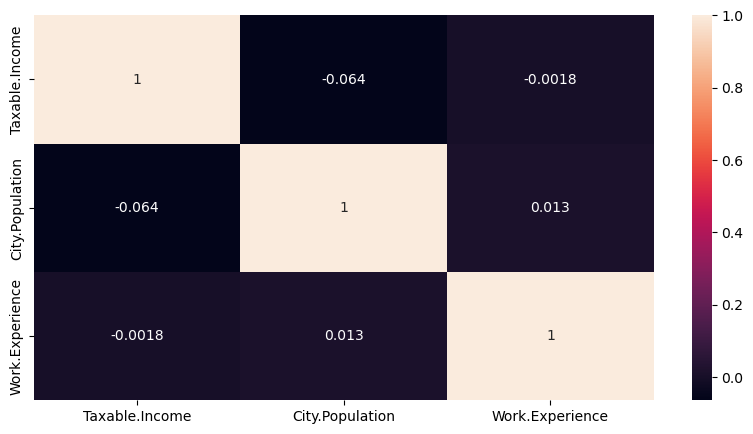

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,5))
snb.heatmap(fraud.corr(),annot=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()

In [12]:
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])

In [13]:
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status'])

In [14]:
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])

In [15]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [16]:
fraud.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'Income', 'City.Population': 'Population', 'Work.Experience': 'work_exp'}, inplace= True)

In [17]:
fraud['status'] = fraud['Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')

In [18]:
fraud

,Undergrad,marital_status,Income,Population,work_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


### Splitting Features, Target & Performing Train Test Split

In [19]:
fraud.drop(['Income'], axis=1)

,Undergrad,marital_status,Population,work_exp,Urban,status
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [20]:
fraud['status'] = label_encoder.fit_transform(fraud['status'])

In [21]:
features = fraud.iloc[:,0:5]
features

,Undergrad,marital_status,Income,Population,work_exp
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [22]:
target = fraud['status']
target

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int32

In [23]:
target.value_counts()

0    476
1    124
Name: status, dtype: int64

### Model Building using Entropy

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size= 0.75, random_state=40)

In [26]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

##### Prediction on Training Data

In [28]:
pred_train1 = model1.predict(x_train)

In [29]:
accuracy_score(pred_train1,y_train)

1.0

In [30]:
print(classification_report(pred_train1,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00        90

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



##### Prediction on Test Data

In [31]:
pred_test1 = model1.predict(x_test)

In [32]:
accuracy_score(pred_test1,y_test)

1.0

In [33]:
print(classification_report(pred_test1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00        34

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



##### Visualising the Decision Tree using Entropy

Text(0.5, 1.0, 'Decision Tree using Entropy')

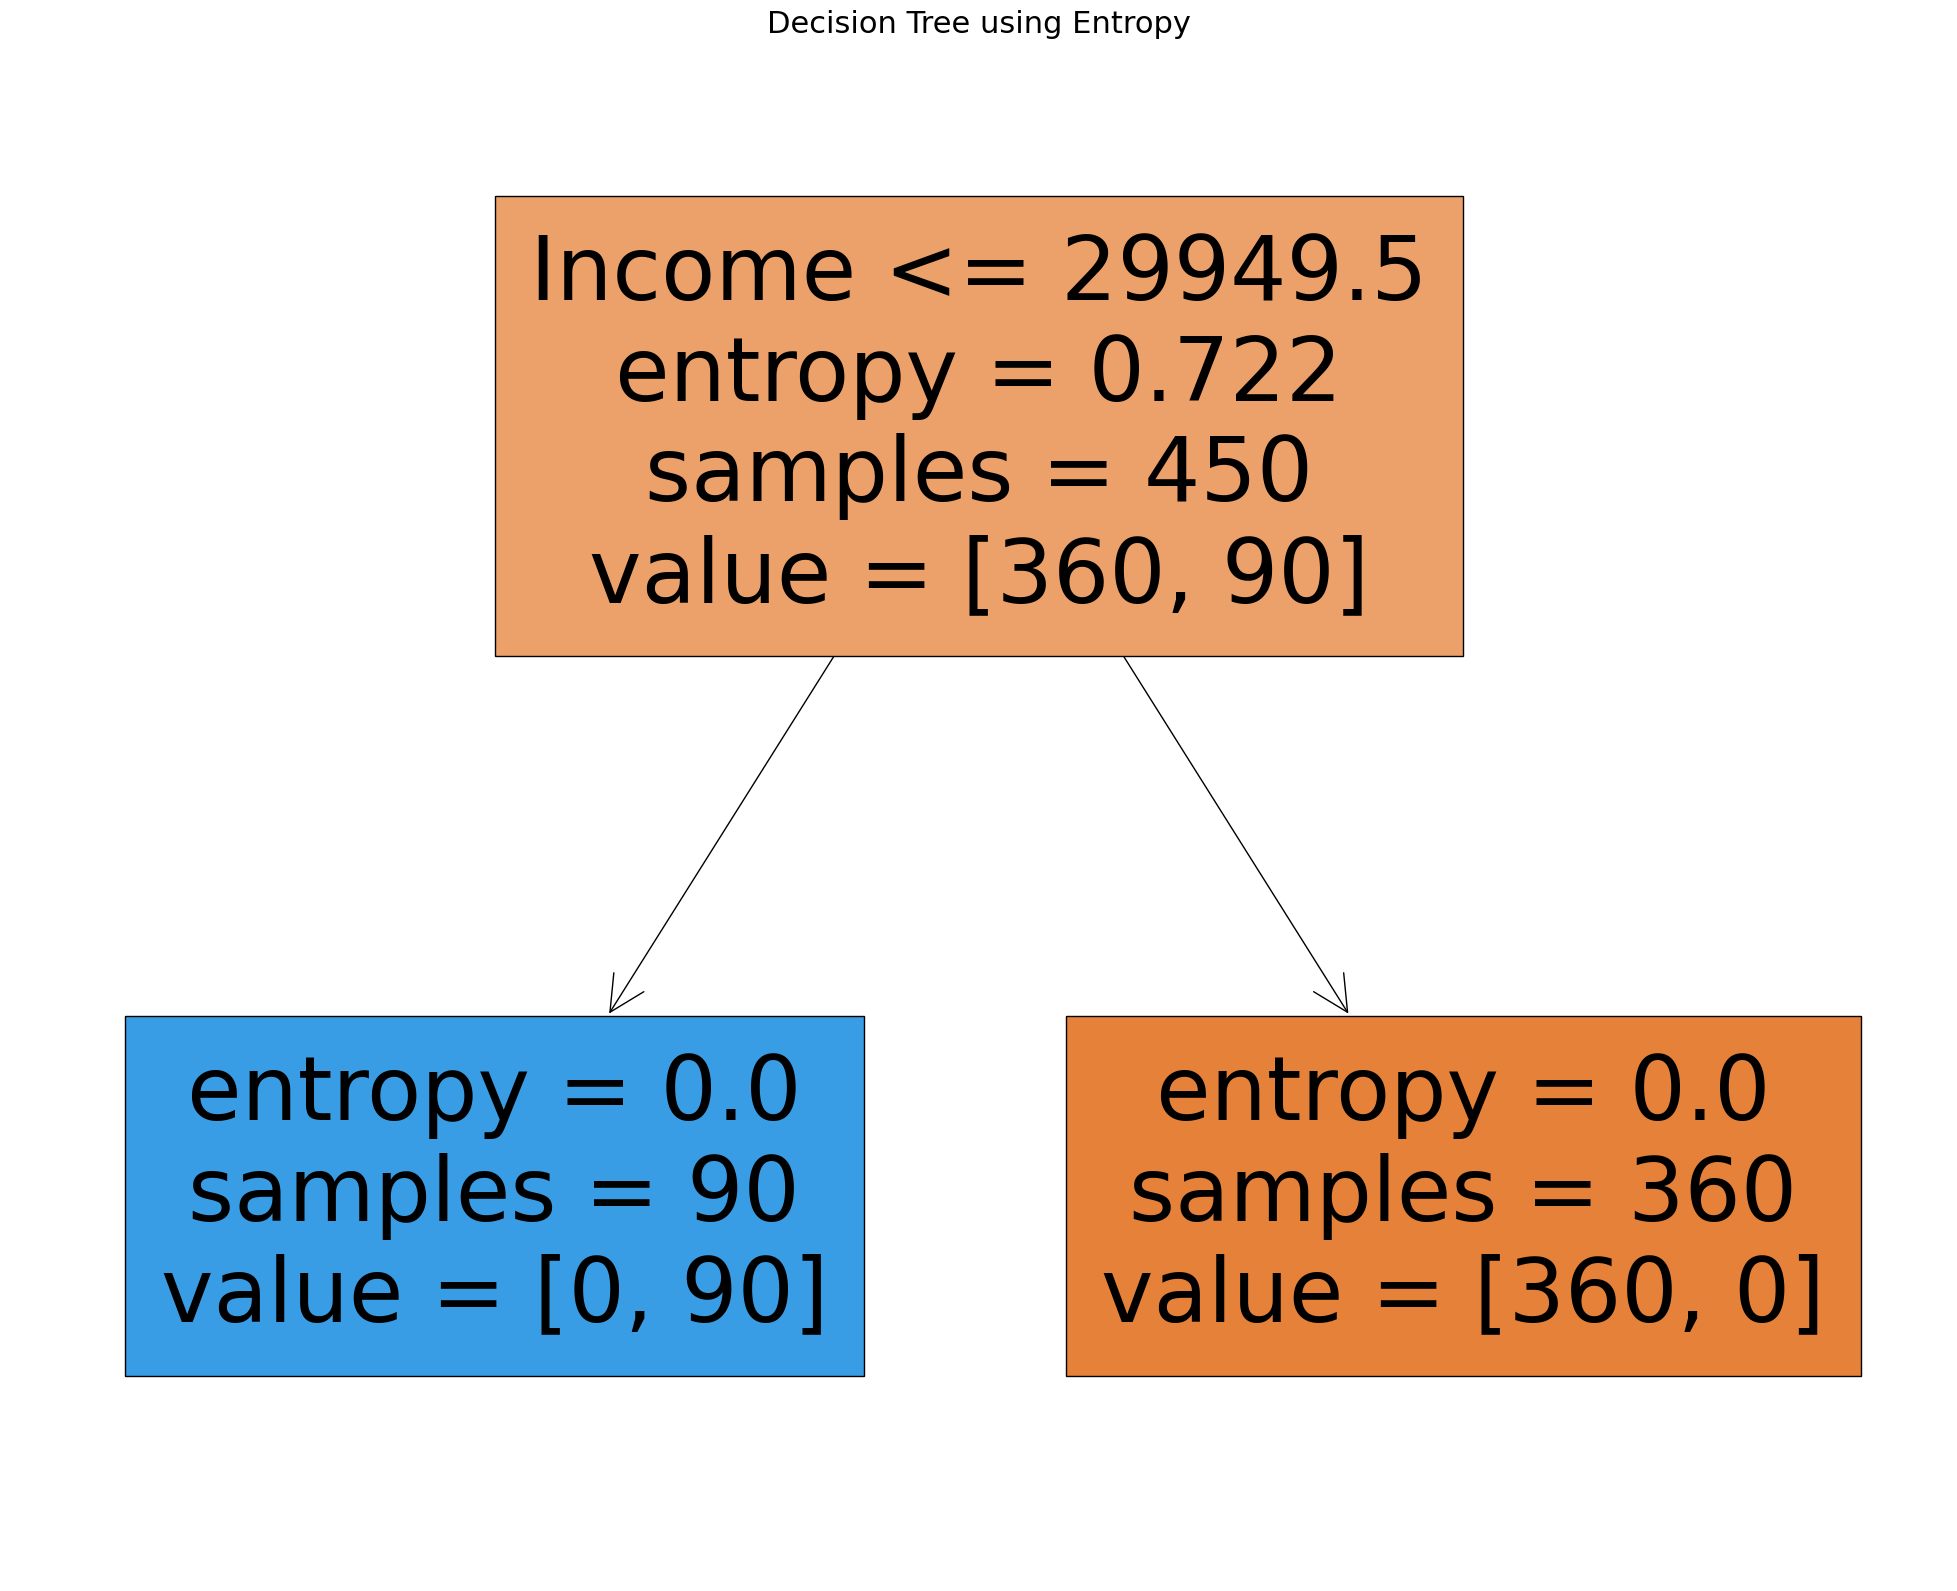

In [34]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model1, feature_names=['Undergrad', 'marital_status', 'Income', 'Population', 'work_exp'], filled=True)
plt.title('Decision Tree using Entropy',fontsize=22)

### Model Building using Gini

In [35]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [36]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
pred_train_g1 = model_gini.predict(x_train)

In [38]:
accuracy_score(pred_train_g1,y_train)

1.0

In [39]:
print(classification_report(pred_train_g1,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00        90

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



##### Prediction on Test Data

In [40]:
pred_test_g1 = model_gini.predict(x_test)

In [41]:
accuracy_score(pred_test_g1,y_test)

1.0

In [42]:
print(classification_report(pred_test_g1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00        34

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



##### Visualising the Decision Tree using Gini

Text(0.5, 1.0, 'Decision Tree using Entropy')

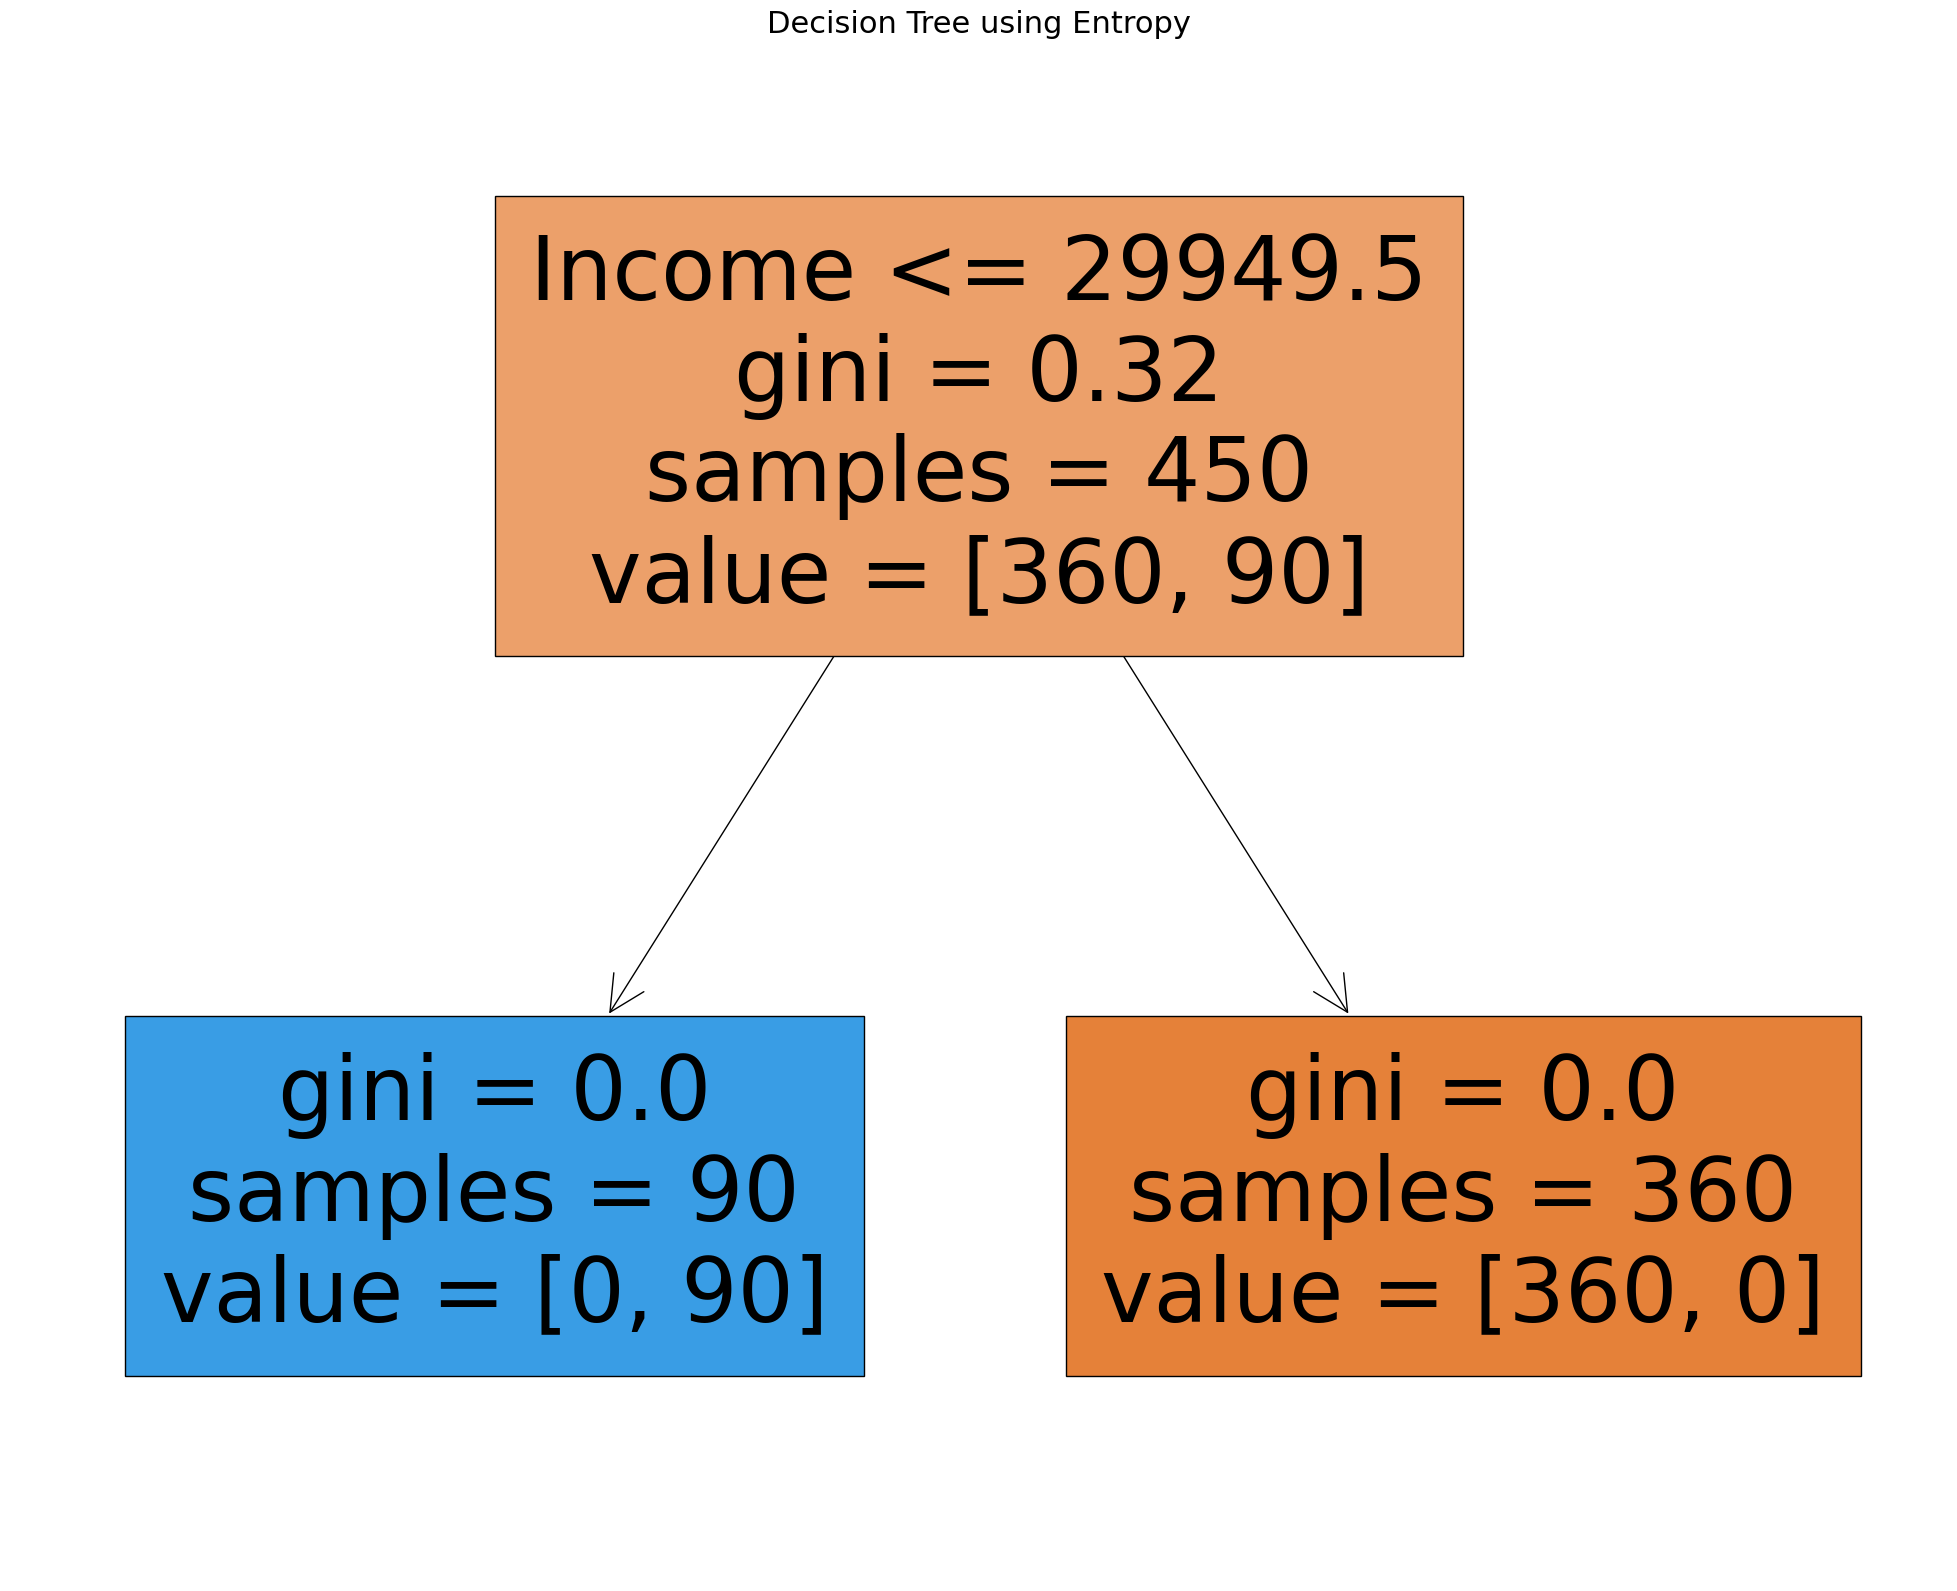

In [43]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini, feature_names=['Undergrad', 'marital_status', 'Income', 'Population', 'work_exp'], filled=True)
plt.title('Decision Tree using Entropy',fontsize=22)